# Tutorial 08 - Working with physiological data

The Phys class handles physiology data similarly to how the Ephys class handles Electrophysiology data. The Phys and Ephys classes are children of the _TsData class. The majority of methods belong to the _TsData class meaning that Phys and Ephys object inherit many of the same methods.

## Pre-processing data

The Phys class reads data from non-hdf5 MatLab (.mat) files. Pre-processing of raw data is necessary to transform files into this format. Software such as LabChart https://www.adinstruments.com/support/software will transform raw .adicht files into .mat files. To create the MatLab file, open LabChart and open the raw data file. Click on the 'File' dropdown in the upper left corner and select export. Set the file type to be "MATLAB" and select a file name and location. A window will pop up with different export options. Choose the desired channels and make sure the 'upsample to same rate' option is selected. This will ensure a consistent sample rate by interpolating data points. PyCAP currently does not support data with different sampling rates between blocks or channels.


## Instantiating a Phys object

Phys objects can be instantiated similarly to Ephys and Stim objects. Only a path name to a properly formatted .mat file is necessary.


## TODO: find a small data set that will work with this example and update code to work with it.

In [1]:
import pyCAP

# instantiate Phys object with a path name.
path = r"C:\Users\malal\Documents\WITNE\pyCAP\physdata\STIM_HR_BP.mat"
data = pyCAP.Phys(path)

## Reading in one file as multiple data sets

ADInstruments data is stored in blocks of data. Each block of data represents a period of time when the recording was started and stopped. The Phys class offers the option to read in one file as multiple data sets. Each block is considered a different data set. Set the 'mult_data' parameter to True in order to read in multiple data sets from one file. The example below illustrates this concept. The ndata property represents the amount of data sets in the object.

In [2]:
# instantiate a phys object with data sets corresponding to blocks
data_by_blocks = pyCAP.Phys(path, mult_data=True)

print("Number of data sets when read by file: " + str(data.ndata))
print("Number of data sets when read by blocks: " + str(data_by_blocks.ndata))

Number of data sets when read by file: 1
Number of data sets when read by blocks: 22


The array property will not be affected by reading in one file as multiple data sets. This is because the arrays from each data set are concatenated across blocks when the array property is called.

In [3]:
print("Shape of array when read by file: " + str(data.shape))
print("Shape of array when read by blocks: " + str(data_by_blocks.shape))

Shape of array when read by file: (3, 34605650)
Shape of array when read by blocks: (3, 34605650)


Reading in one file as multiple data sets is extremely helpful when the data contains gaps in times. When the data is read in by blocks, the start and end time of each block is recorded. If there are significant gaps in time between the recording of each block, these gaps will be taken into account. If the entire file is read in as one data set, only one start and end time will be recorded. The plot below shows how gaps in time become visible when reading in data by blocks using the plot_times method.

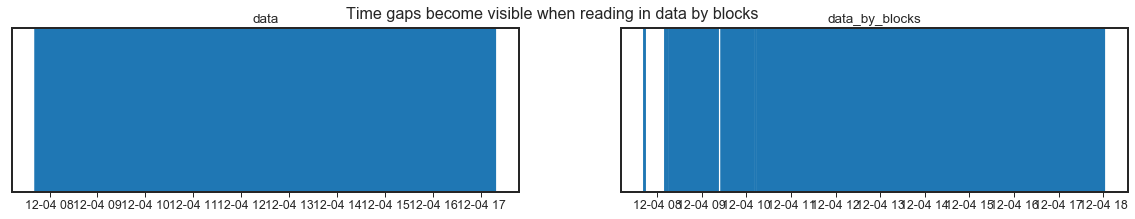

In [4]:
import matplotlib.pyplot as plt

# set up subplot and title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 3))
fig.suptitle("Time gaps become visible when reading in data by blocks")

# create time plots
data.plot_times(axis = ax1, show = False)
data_by_blocks.plot_times(axis = ax2, show = False)

# set subplot titles
ax1.set_title("data")
ax2.set_title("data_by_blocks")

# show plots
plt.show()

## Units in the data

LabChart files exported to matlab include units for each channel and block combination. The units method is used to access these units. Calling this method creates a list of dictionaries. Each dictionary in the list represents a data set in the Phys object and each dictionary links channel names to unit values. 

If the units are different inside one channel between blocks, exercise caution when plotting or filtering data. The code will likely run but semantic errors are likely.

In [5]:
# output of the units method for data_by_blocks
data_by_blocks.units

[{'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'V   '},
 {'Channel 6': 'V   ', 'Channel 7': 'BPM ', 'Channel 9': 'mmHg'},
 {'Channel

In [6]:
# renaming or removing channels is automatically reflected in the results of the 'units' method.
data_by_blocks = data_by_blocks.set_ch_names(["Stim", "HR", "BP"])
data_by_blocks = data_by_blocks.remove_ch("BP")
data_by_blocks.units

[{'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '},
 {'Stim': 'V   ', 'HR': 'BPM '}]

## Reading in comments from a file

Files exported with LabChart have the option to include comments. The comments can be accessed with the function pyCAP.phys.get_comments. This function will return a dictionary of dictionaries with channel name and comment name as keys, and a numpy array of timestamps as values. Timestamps are in seconds since epoch. The parameter 'comtype' is used to specify the comment type. Specify 'user' for user comments, 'event' for autogenerated comments, or 'both' for both types.

In [7]:
# get comments of both types and display them

# TODO: this file was taken from the LabChart default examples, it must be substituted
comment_file_path = r"C:\Users\malal\Documents\WITNE\pyCAP\physdata\KnifefishJARupsample.mat"
comments = pyCAP.phys.get_comments(comment_file_path, comtype="both")
comments

{'Stimulator': {' baseline      ': array([1.2826639e+09]),
  ' Stim on 709Hz ': array([1.28266391e+09]),
  ' 20 min        ': array([1.28266507e+09]),
  ' 40 min        ': array([1.28266637e+09])},
 'Spectrum  ': {' baseline      ': array([1.2826639e+09]),
  ' Stim on 709Hz ': array([1.28266391e+09]),
  ' 20 min        ': array([1.28266507e+09]),
  ' 40 min        ': array([1.28266637e+09])},
 'Efish     ': {' baseline      ': array([1.2826639e+09]),
  ' Stim on 709Hz ': array([1.28266391e+09]),
  ' 20 min        ': array([1.28266507e+09]),
  ' 40 min        ': array([1.28266637e+09])}}

In [8]:
# comment dictionary can be indexed with channel and comment name

# find name of the first channel and first comment
channel = list(comments.keys())[0]
com = list(comments[channel].keys())[0]

# output numpy array corresponding to first channel and first comment
first_comment_array = comments[channel][com]
first_comment_array

array([1.2826639e+09])

In [9]:
# The python datetime module can be used to transform the timestamps into a more readable format
import datetime as dt

# creates a datetime object from the first comment array
dt.datetime.fromtimestamp(first_comment_array[0])

datetime.datetime(2010, 8, 24, 10, 31, 41, 749542)

## Troubleshooting

PyCAP expects data in a specific format when reading in files. Properly exporting the data with labchart is essential in order for the code to run. When the Phys class reads in data, it expects a .mat file with the following variable names and array dimensions. The scipy.io.loadmat function is used to access the data. It creates a python dictionary with variable names as keys and numpy arrays as values. The following key-value pairs are expected with the following dimesions. The full file may contain more arrays than this, but only the following are required.

### Required arrays to instantiate a Phys object

* data : All raw data points (1 x number of data points array of all data points)

* datastart: Array of matlab start indices for each block, channel combination (number of channels x number of blocks)

* dataend: Array of matlab end indices for each block, channel combination (number of channels x number of blocks)

* titles: One dimensional vector of channel names

* unittext: One dimensional vector of all units

* unittextmap: Array of indices linking the unittext vector to each block and channel (number of channels x number of blocks)

* blocktimes: Matlab start time of each block (1 x number of blocks)

* tickrate: Maximum sample rate of each block (1 x number of blocks)

* samplerate: Sample rate for each channela and block combination (number of channels x number of blocks)

* firstsampleoffset: Percent of the way through each block when the recording started (number of channels x number of blocks)

### Optional arrays for reading in comments

* com: Array of all comments (5 x number of comments)

* comtext: One dimensional vector of all commment names

for more information on how this data is created, visit https://www.adinstruments.com/support/knowledge-base/how-does-matlab-open-exported-data

## Ensuring the file type is correct

Incorrect File types will cause issues with the scipy.io.loadmat function. Files should be .mat files not saved in an hdf5 format. Labchart should automatically export files in a non-hdf5 format. However, later versions of MatLab will save files as hdf5 if the '-v7.3' flag is used to save. Re-exporting data from LabChart with the pre-processing steps above should create a .mat file that is readable with pyCAP.

## Ensuring the arrays are formatted properly

To ensure the arrays are formatted properly, check the names and dimensions of each array. The Phys class has built in warnings to access these warnings when reading in data, set the 'check' parameter in the constructor to True. The following are possible warnings:

 * Array formatted improperly: This warning is generated if data is not exported to the matlab file correctly and the arrays have incorrect dimensions.

* NaN values in data: This warning is generated if there are NaN values in the data. This may cause problems when plotting data. Ensure that y limits are specified manually.

* Inconsistent sample rates: This warning is generated when the data has inconsistent sample rates. Reading this data is not yet implemented. Ensure that data is exported with consistent sample rates.

* Inconsistent units: This warning is generated when a channel has more than one unit across the experiment.

* Offset in data blocks: Warns about offsets in the start time of each channel. See the 'firstsampleoffset' array at https://www.adinstruments.com/support/knowledge-base/how-does-matlab-open-exported-data for more information.


These checks on the data ensure that code will run properly. Improperly formatted data may cause different methods to crash or return an incorrect result.


In [10]:
# read in the data, but warn of any potent
pyCAP.Phys(path, check=True)

# This data set has NaN values and inconsistent units in a channel

c:\users\malal\documents\witne\pycap\pycap\pyCAP\io\adinstruments_io.py:61: UserWarning: Encountered NaN values in data
  warnings.warn("Encountered NaN values in data")
c:\users\malal\documents\witne\pycap\pycap\pyCAP\io\adinstruments_io.py:70: UserWarning: Inconsistent units in channel Channel 9
  warnings.warn("Inconsistent units in channel {}".format(raw_data["titles"][channel]))


## Dealing with improperly formatted arrays

When instantiating a Phys object, array names and dimensions will automatically be checked. A warning will be generated if the name or dimensions of one of the required arrays is incorrect. LabChart 7 has in issue with exporting timestamps on Macintosh computers. 

The two options for dealing with improperly formatted data are to try re-exporting the data or fixing the broken arrays manually and passing them to the to_array or to_meta functions.

Support for ADInstruments Labchart 7 on Macintosh:
https://www.adinstruments.com/support/knowledge-base/why-are-timestamps-missing-matlab-when-i-export-my-labchart-7-file-matlab

### Manually creating a Phys object

Phys objects can also be instantiated with data and metadata instead of a file name. The following code can be used to create objects with a greater degree of customization if the automated code fails. This technique can also be used to modify channel names, units, or other properties before. Note that this process will not generate warnings about bad data unless the function check_data is called.

The function that pyCAP uses to read .mat files is the scipy.io.loadmat function. This function returns a dictionary with each key as a variable name and each value as a numpy array. The following example reads in data with this function and prints the name and dimensions of every array in the file.

In [11]:
# import scipy.io
import scipy.io as sio

# allow python to read matlab files
# if this function crashes, the file type is most likely incorrect
raw = sio.loadmat(path)

# print every array name and shape
for array_name in raw:
    print("array '{}' with shape {}".format(array_name, raw[array_name].shape))

array 'data' with shape (1, 103816950)
array 'datastart' with shape (3, 22)
array 'dataend' with shape (3, 22)
array 'titles' with shape (3,)
array 'rangemin' with shape (3, 22)
array 'rangemax' with shape (3, 22)
array 'unittext' with shape (3,)
array 'unittextmap' with shape (3, 22)
array 'blocktimes' with shape (1, 22)
array 'tickrate' with shape (1, 22)
array 'samplerate' with shape (3, 22)
array 'firstsampleoffset' with shape (3, 22)


### Manually creating a Phys object continued

The following example code illustrates the creation of a Phys object with data and metadata read directly from the file. Any modifications to the data can be made through this process. Converting units and chopping off blocks of data are useful examples of creating custom Phys objects. Data may also be read from other file types or software systems and used to create a Phys object as long as the data is formatted correctly into numpy arrays before being passed into the to_meta and to_array functions.

In [12]:
import pyCAP

# load in the data and assign variable names
raw = sio.loadmat(path)
data = raw['data']
datastart = raw['datastart']
dataend = raw['dataend']
tickrate = raw['tickrate']
titles = raw['titles']
unittext = raw['unittext']
unittextmap = raw['unittextmap']
blocktimes = raw['blocktimes']

# check the data and generate warnings (make sure to turn on warnings if they are off with warnings.filterwarnings())
# pyCAP.io.adinstruments_io.check_data(raw)

# Add additional code here to properly format arrays or change properties

# create metadata dictionary
metadata = pyCAP.io.adinstruments_io.to_meta(datastart, dataend, tickrate, titles, unittext, unittextmap, blocktimes, mult_data = False)
# create data array
array = pyCAP.io.adinstruments_io.to_array(data, datastart, dataend, mult_data = False)

# instantiate the object
data = pyCAP.Phys(array, metadata = metadata, daskify = False)

# output the array used to instantiate the object
data.array


,Array,Chunk
Bytes,415.27 MB,819.20 kB
Shape,"(3, 34605650)","(1, 204800)"
Count,3228 Tasks,507 Chunks
Type,float32,numpy.ndarray
